# Biogeochemical functional groups of phytoplankton after the peak

# Set input directory and load libraries

In [1]:
dirname_prefix='../../run_20230324_0000_EXP2_1rbcsno3times'
dirname_suffx ='sioh4times1_00'

In [2]:
import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd

# Read

## Read: nutrients

In [3]:
simulations=np.arange(0.25,2.10,0.25)
my_formatter='{0:.2f}'

Vertically integrated nitrate
(0-100 m, $\mathrm{ mmol\ N\ m^{-2} }$)
and vertically integrated silicic acid
(0-100 m, $\mathrm{ mmol\ Si\ m^{-2} }$).

In [4]:
nutrients_files=[dirname_prefix\
                 +my_formatter.format(sim).replace('.','_')\
                 +dirname_suffx\
                 +'/nutrients.csv'\
                 for sim in simulations]
nutrients_frames=[pd.read_csv(f,dtype=np.float32)\
                  for f in nutrients_files]
nutrients_df=pd.concat(nutrients_frames,axis='index')
nutrients_df.index=simulations

Nitrate:silicic acid molar ratio (0-100 m, unitless).

In [5]:
def molar_ratio(row):
    return row['nitrate0_100_onMay15_mmolNm2']\
/row['silicicacid0_100_onMay15_mmolSim2']
nutrients_df['nitrate_silicicacid_molar_ratio0_100_onMay15']\
=nutrients_df.apply(lambda row:molar_ratio(row),axis=1)

Observed nitrate (EXP-2.1 \*1.00) at the sea ice camp in Qikiqtarjuaq 2016.

In [6]:
obsnitrate=nutrients_df.loc[1.00,'nitrate0_100_onMay15_mmolNm2']

Observed nitrate:silicic acid molar ratio (EXP-2.1 \*1.00) at the sea
ice camp in Qikiqtarjuaq 2016.

In [7]:
obsmr=nutrients_df.loc[1.00,'nitrate_silicicacid_molar_ratio0_100_onMay15']

# Read: groups

In [8]:
simulations=np.arange(0.25,2.10,0.25)
my_formatter='{0:.2f}'
files=[dirname_prefix\
       +my_formatter.format(sim).replace('.','_')\
       +dirname_suffx\
       +'/groups_after_peak.csv'\
       for sim in simulations]
frames=[pd.read_csv(f,dtype=np.float32) for f in files]
groups_after_peak_df=pd.concat(frames)
groups_after_peak_df.index=simulations

In [9]:
groups_after_peak_df=pd.concat([nutrients_df,groups_after_peak_df],
                               axis='columns')

In [10]:
groups_after_peak_df

,nitrate0_100_onMay15_mmolNm2,silicicacid0_100_onMay15_mmolSim2,nitrate_silicicacid_molar_ratio0_100_onMay15,diatoms_biomass_afterpeak_gCm2,dino_biomass_afterpeak_gCm2,other_biomass_afterpeak_gCm2,pico_biomass_afterpeak_gCm2,total_biomass_afterpeak_gCm2,diatoms_perc_afterpeak,dino_perc_afterpeak,other_perc_afterpeak,pico_perc_afterpeak
0.25,140.963226,816.180542,0.172711,88.648026,25.627728,68.058731,40.202843,222.537323,39.835125,11.516148,30.583063,18.065662
0.50,281.751801,815.054749,0.345684,132.480392,29.542225,77.462723,38.266327,277.751678,47.697426,10.636201,27.889202,13.777173
0.75,422.526093,813.987427,0.519082,163.960678,29.378340,70.834412,41.695766,305.869202,53.604836,9.604870,23.158400,13.631894
1.00,563.316467,812.946960,0.692931,195.681686,29.748089,65.562019,45.145016,336.136810,58.214893,8.849995,19.504564,13.430548
1.25,704.119080,811.991272,0.867151,217.056213,28.545538,61.972630,47.636635,355.210999,61.106274,8.036220,17.446709,13.410799
1.50,844.990417,811.758606,1.040938,217.537979,38.242004,63.832939,48.676464,368.289398,59.067135,10.383683,17.332277,13.216907
1.75,985.909851,811.821655,1.214441,211.483429,54.037926,63.685036,49.726475,378.932861,55.810265,14.260554,16.806417,13.122766
2.00,1126.845459,811.841248,1.388012,209.626343,59.524166,63.466232,50.028008,382.644745,54.783539,15.555987,16.586203,13.074270


The simulations are equally spaced up to 3 significant digits for the nitrate.

In [11]:
np.array(groups_after_peak_df['nitrate0_100_onMay15_mmolNm2'].iloc[1:])\
-np.array(groups_after_peak_df['nitrate0_100_onMay15_mmolNm2'].iloc[:7])

array([140.78857, 140.77429, 140.79037, 140.80261, 140.87134, 140.91943,
       140.93561], dtype=float32)

The simulations are equally spaced up to 2 significant digits for the molar ratio.

In [12]:
np.array(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].iloc[1:])\
-np.array(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].iloc[:7])

array([0.17297366, 0.17339733, 0.17384958, 0.17421961, 0.173787  ,
       0.1735034 , 0.17357063], dtype=float32)

# Plots

## Plots: biomass

In $\mathrm{ g\ C\ m^{-2} }$.

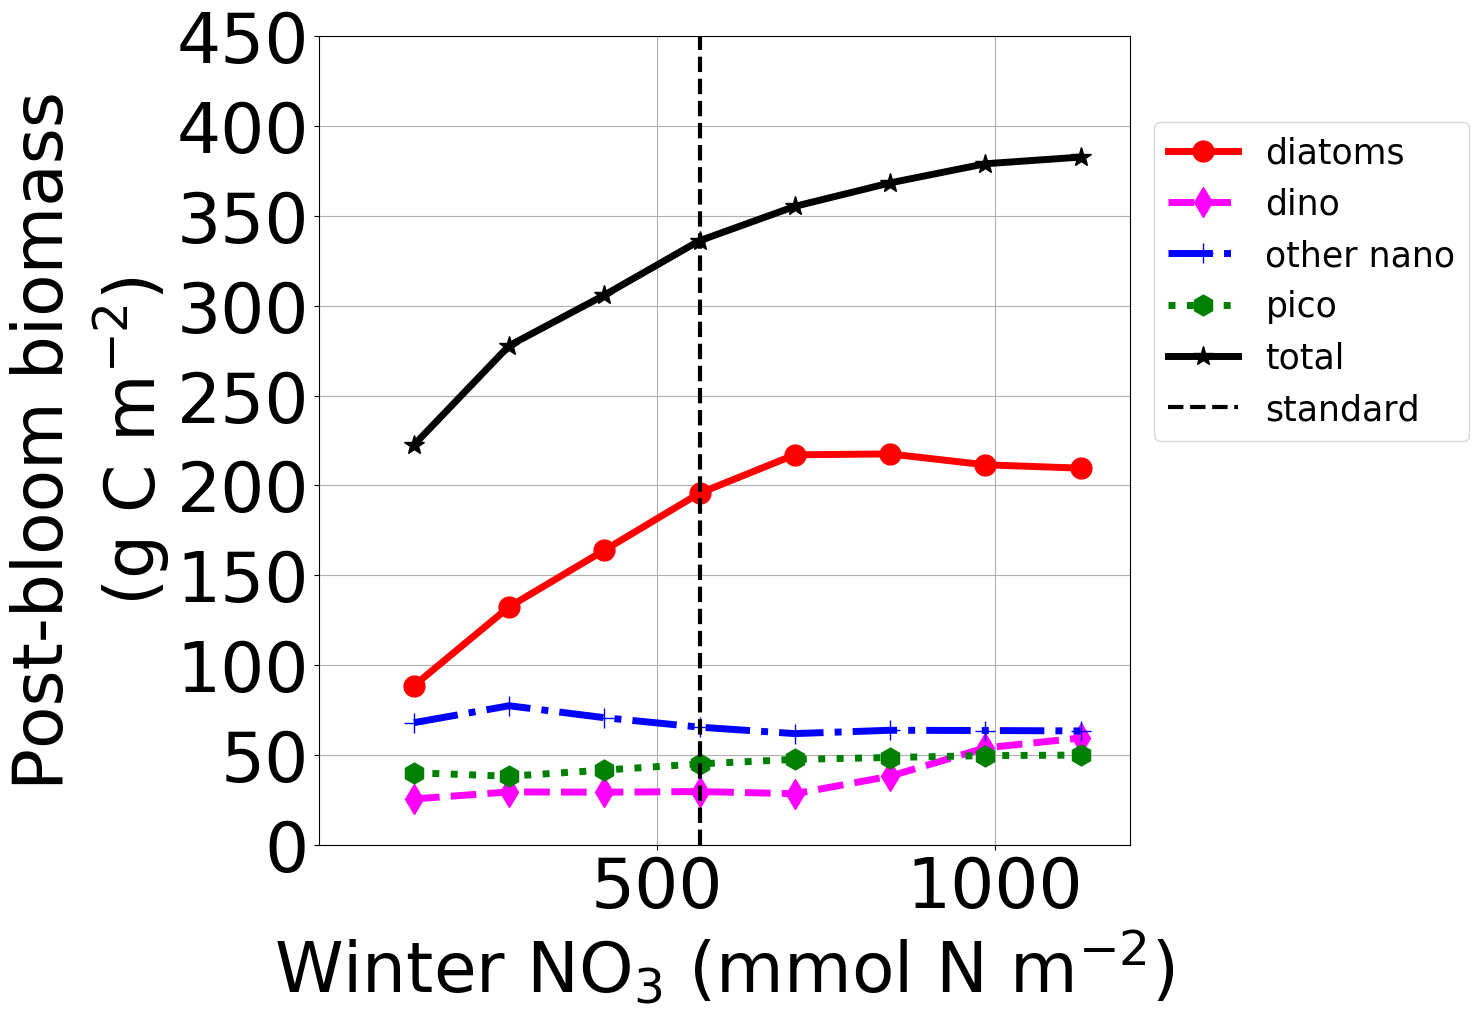

In [13]:
def make_plots(ax):
    plt.plot(groups_after_peak_df['nitrate0_100_onMay15_mmolNm2'].values,
             groups_after_peak_df['diatoms_biomass_afterpeak_gCm2'].values,
             color='red',marker='o',ls='-',label='diatoms')
    plt.plot(groups_after_peak_df['nitrate0_100_onMay15_mmolNm2'].values,
             groups_after_peak_df['dino_biomass_afterpeak_gCm2'].values,
             color='magenta',marker='d',ls='--',label='dino')
    plt.plot(groups_after_peak_df['nitrate0_100_onMay15_mmolNm2'].values,
             groups_after_peak_df['other_biomass_afterpeak_gCm2'].values,
             color='blue',marker='+',ls='-.',label='other nano')
    plt.plot(groups_after_peak_df['nitrate0_100_onMay15_mmolNm2'].values,
             groups_after_peak_df['pico_biomass_afterpeak_gCm2'].values,
             color='green',marker='h',ls=':',label='pico')
    plt.plot(groups_after_peak_df['nitrate0_100_onMay15_mmolNm2'].values,
             groups_after_peak_df['total_biomass_afterpeak_gCm2'].values,
             color='black',marker='*',ls='-',label='total')
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$ ($\mathrm{ mmol\ N\ m^{-2} }$)')
    ax.set_ylabel('Post-bloom biomass\n($\mathrm{ g\ C\ m^{-2} }$)')
    ax.set_xlim(0,1200)
    ax.set_ylim(0,450)
    ax.set_xticks(np.arange(500,1201,500))
    ax.axvline(obsnitrate,
               color='k',ls='--',lw=3,label='standard')
    ax.grid()
    ax.legend(loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('biomass_vs_nitrate.exp2.1.png')

Figure. Biomass of the different groups between the bloom peak and the end of year for different values of nitrate vertically integrated (0-100m) on May 15 ($\mathrm{ mmol\ N\ m^{-2} }$). Dotted vertical line was the observed winter nitrate at the Green Edge sea ice camp 2016.

## Plots: molar ratio

Unitless.

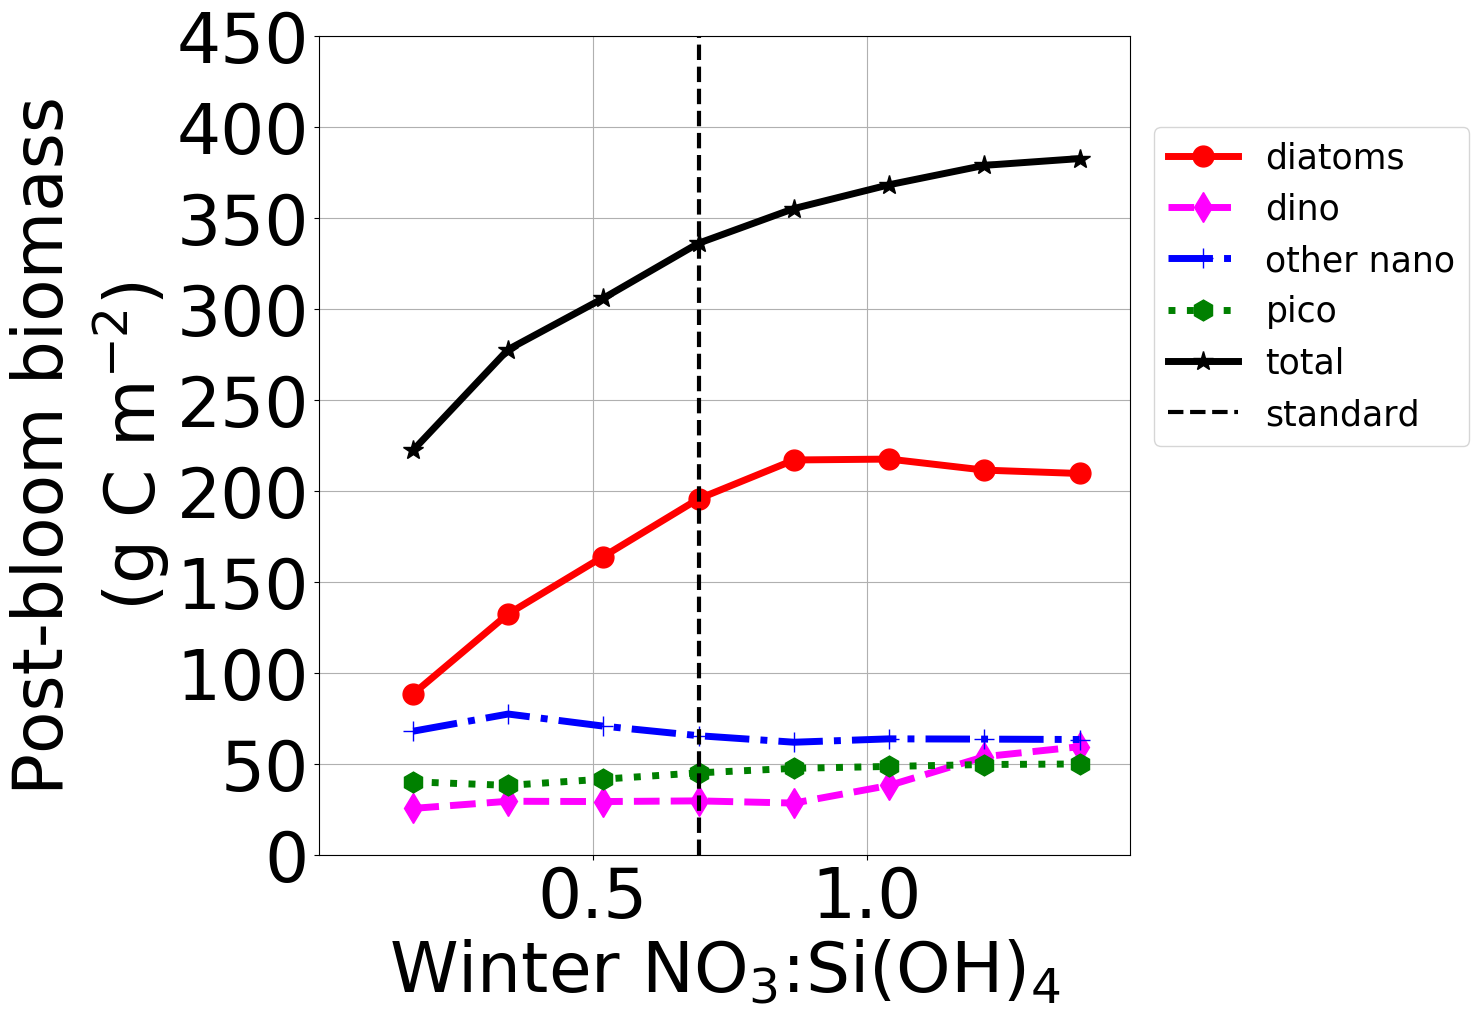

In [14]:
def make_plots(ax):
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['diatoms_biomass_afterpeak_gCm2'].values,
             color='red',marker='o',ls='-',label='diatoms')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['dino_biomass_afterpeak_gCm2'].values,
             color='magenta',marker='d',ls='--',label='dino')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['other_biomass_afterpeak_gCm2'].values,
             color='blue',marker='+',ls='-.',label='other nano')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['pico_biomass_afterpeak_gCm2'].values,
             color='green',marker='h',ls=':',label='pico')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['total_biomass_afterpeak_gCm2'].values,
             color='black',marker='*',ls='-',label='total')
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$')
    ax.set_ylabel('Post-bloom biomass\n($\mathrm{ g\ C\ m^{-2} }$)')
    ax.set_xlim(0,1.48)
    ax.set_ylim(0,450)
    ax.set_xticks(np.arange(0.50,1.48,0.50))
    ax.axvline(obsmr,
               color='k',ls='--',lw=3,label='standard')
    ax.grid()
    ax.legend(loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('biomass_vs_mr.exp2.1.xlim0_1_48.png')

Figure. Biomass of the different groups between the bloom peak and the
end of year for different values of "winter"
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$.
Winter
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
is the 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
on May 15.
Note that the calculation of the molar ratio was different from Ardyna
et al. (2020) in $Elementa$.
Dotted vertical line was the observed winter 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$ molar ratio at the Green Edge
sea ice camp 2016.

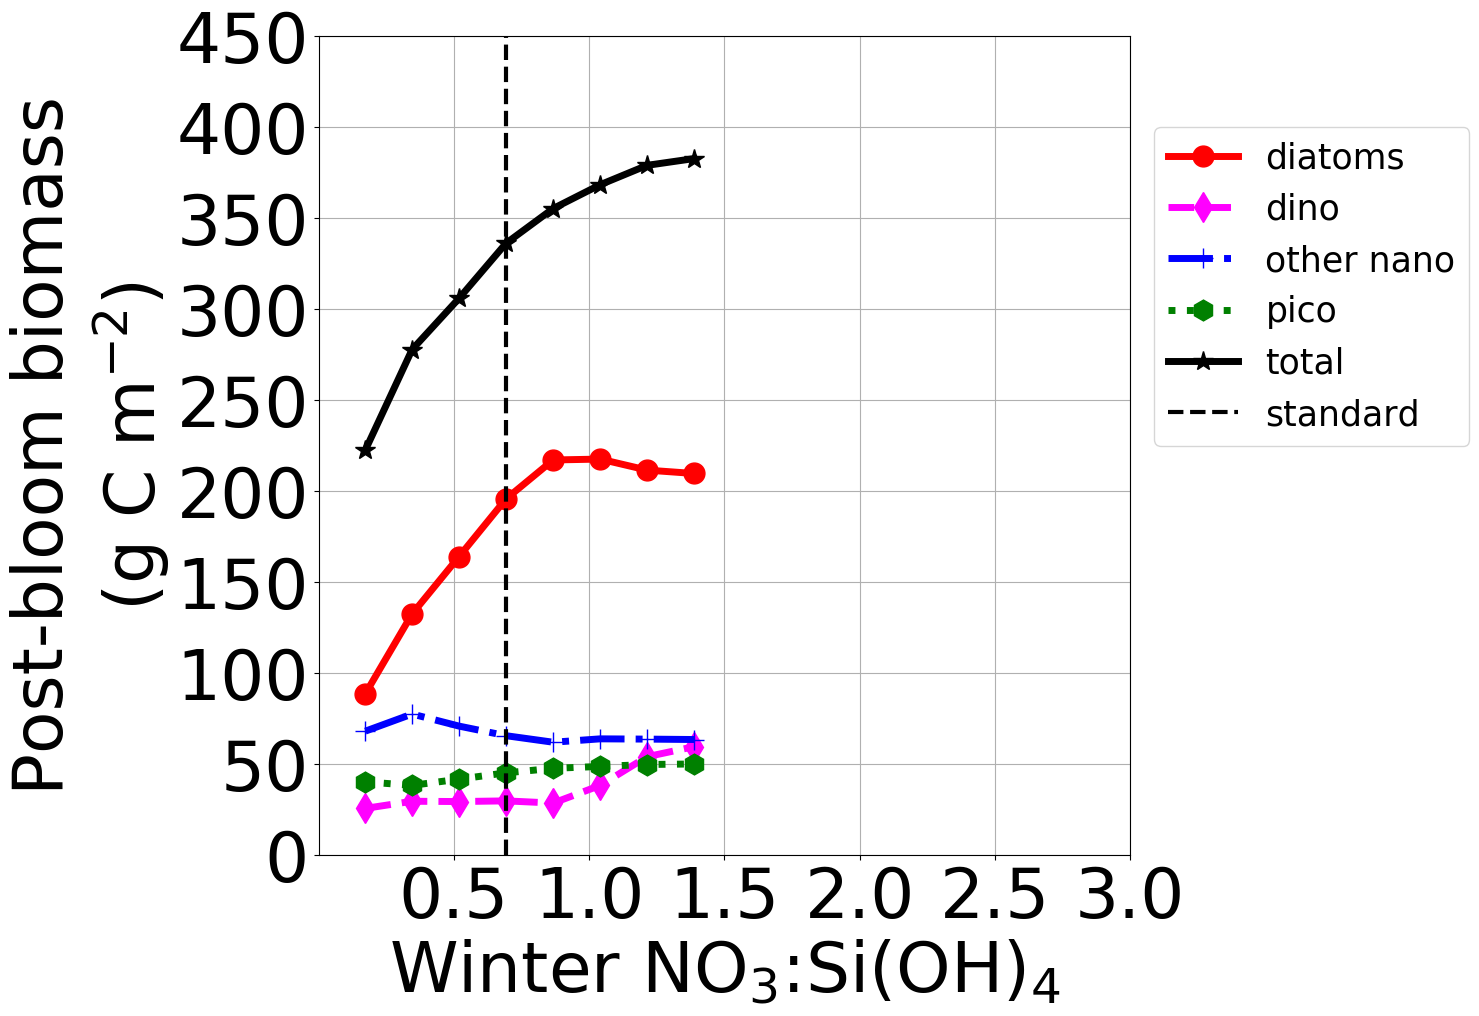

In [15]:
def make_plots(ax):
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['diatoms_biomass_afterpeak_gCm2'].values,
             color='red',marker='o',ls='-',label='diatoms')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['dino_biomass_afterpeak_gCm2'].values,
             color='magenta',marker='d',ls='--',label='dino')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['other_biomass_afterpeak_gCm2'].values,
             color='blue',marker='+',ls='-.',label='other nano')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['pico_biomass_afterpeak_gCm2'].values,
             color='green',marker='h',ls=':',label='pico')
    plt.plot(groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15'].values,
             groups_after_peak_df['total_biomass_afterpeak_gCm2'].values,
             color='black',marker='*',ls='-',label='total')
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$')
    ax.set_ylabel('Post-bloom biomass\n($\mathrm{ g\ C\ m^{-2} }$)')
    ax.set_xlim(0,3)
    ax.set_ylim(0,450)
    ax.set_xticks(np.arange(0.5,3.1,0.5))
#     ax.set_xticks([1,2,3])
#     ax.xaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
    ax.axvline(obsmr,
               color='k',ls='--',lw=3,label='standard')
    ax.grid()
    ax.legend(loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('biomass_vs_mr.exp2.1.xlim0_3.png')

Figure. Biomass of the different groups between the bloom peak and the
end of year for different values of "winter"
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$.
Winter
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
is the 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
on May 15.
Note that the calculation of the molar ratio was different from Ardyna
et al. (2020) in $Elementa$.
Dotted vertical line was the observed winter 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$ molar ratio at the Green Edge
sea ice camp 2016.

## Plots: relative contribution of biomass

In %.

In [16]:
nitrate=groups_after_peak_df['nitrate0_100_onMay15_mmolNm2']
# nitrate

In [17]:
percentages={
    'diatoms':groups_after_peak_df['diatoms_perc_afterpeak'],
    'dino'   :groups_after_peak_df['dino_perc_afterpeak'],
    'other'  :groups_after_peak_df['other_perc_afterpeak'],
    'pico'   :groups_after_peak_df['pico_perc_afterpeak'],
}
# percentages

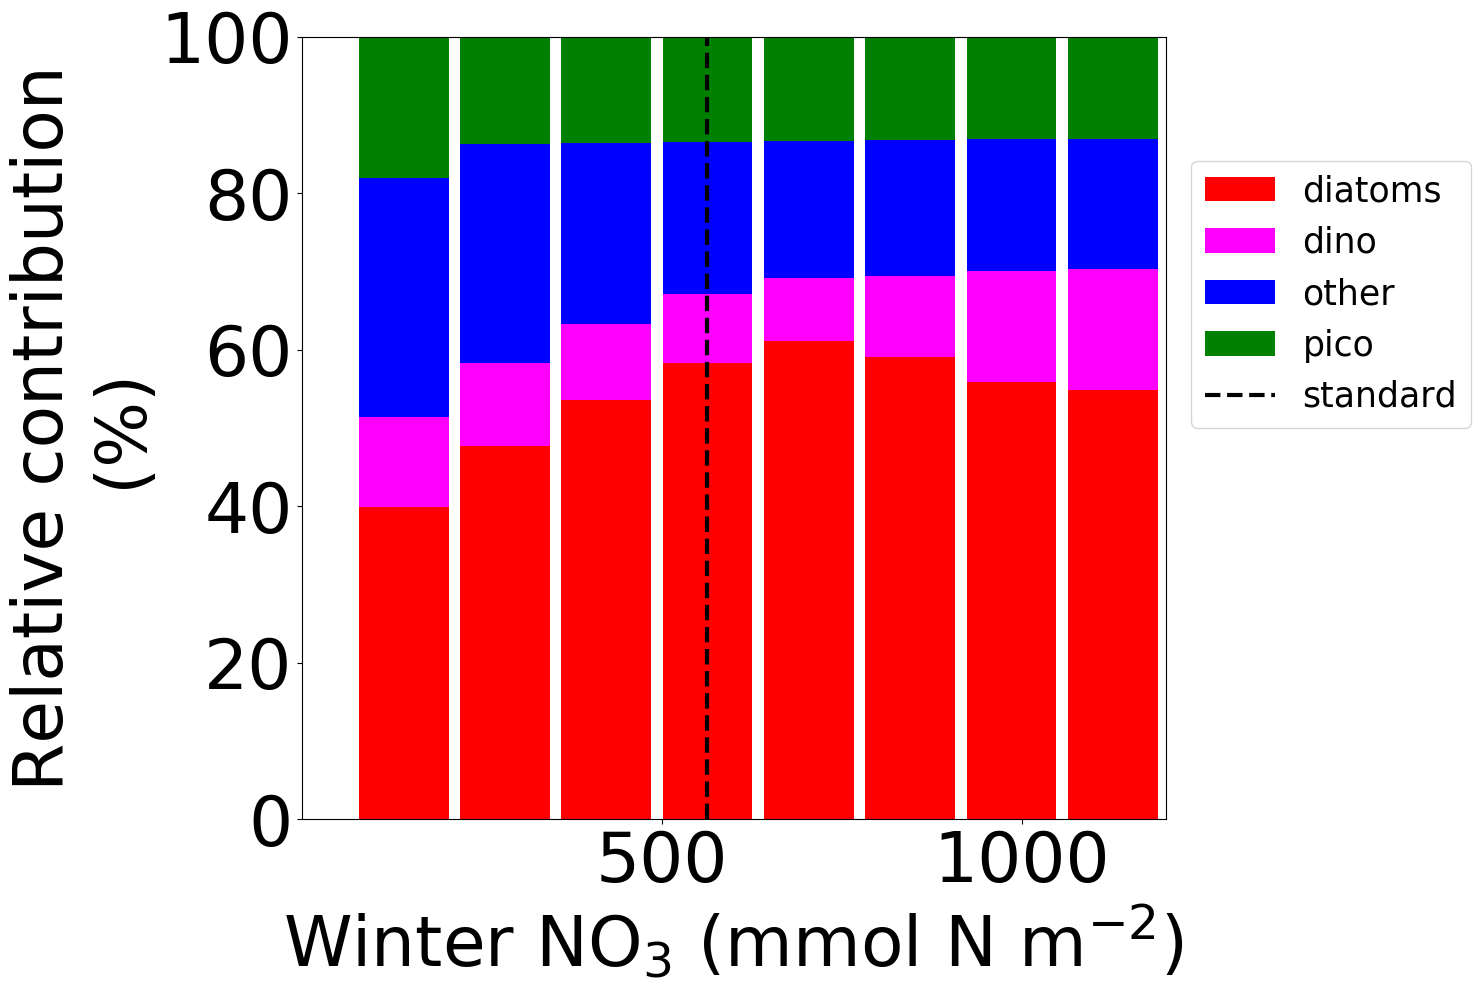

In [18]:
def make_plots(ax):
    width=125
    bottom=np.zeros(len(nitrate))
    cc=cycler.cycler(color=['red','magenta','blue','green'])
    ax.set_prop_cycle(cc)
    for group,percentages_one_group in percentages.items():
        ax.bar(nitrate.values,percentages_one_group,
               width,label=group,bottom=bottom)
        bottom+=percentages_one_group.values
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$ ($\mathrm{ mmol\ N\ m^{-2} }$)')
    ax.set_ylabel('Relative contribution\n(%)')
    ax.set_xlim(0,1200)
    ax.set_ylim(0,100)
    ax.set_xticks(np.arange(500,1201,500))
    ax.axvline(obsnitrate,
               color='k',ls='--',lw=3,label='standard')
    # 'standard' appears at the top of the legend.
    # I don't understand why.
    # the code below solves this problem and places 'legend' at the bottom
    legend_handles,legend_labels=ax.get_legend_handles_labels()
    legend_handles_new=legend_handles[1:]+[legend_handles[0]]
    legend_labels_new=legend_labels[1:]+[legend_labels[0]]
    ax.legend(legend_handles_new,legend_labels_new,loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('percentage_vs_nitrate.exp2.1.png')

Figure. Relative contribution to phytoplankton biomass by
group between the bloom peak and the end of year for different values of nitrate vertically integrated (0-100m) on May 15 ($\mathrm{ mmol\ N\ m^{-2} }$). Dotted vertical line was the observed winter nitrate at the Green Edge sea ice camp 2016.

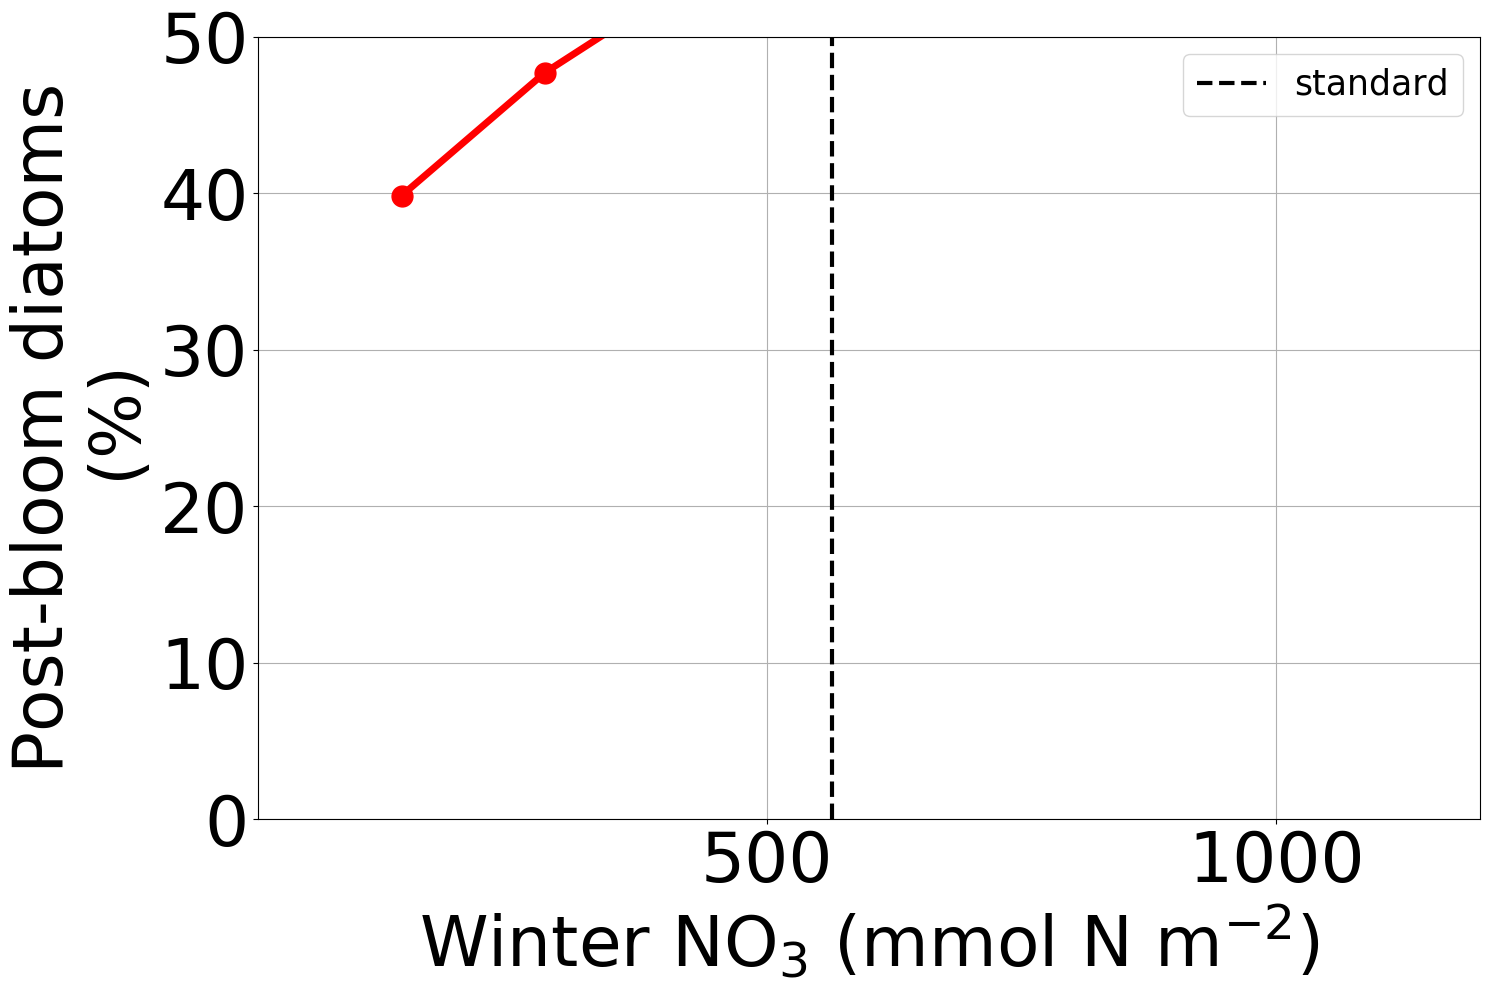

In [19]:
def make_plots(ax):
    plt.plot(nitrate.values,percentages['diatoms'].values,
             linestyle='-',color='red',marker='o')
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$ ($\mathrm{ mmol\ N\ m^{-2} }$)')
    ax.set_ylabel('Post-bloom diatoms\n($\%$)')
    ax.set_xlim(0,1200)
    ax.set_ylim(0,50)
    ax.set_xticks(np.arange(500,1201,500))
    ax.axvline(obsnitrate,
               color='k',ls='--',lw=3,label='standard')
    ax.grid()
    ax.legend()
    plt.tight_layout()
    
with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('percentage_vs_nitrate_diatoms.exp2.1.png')

Figure. Relative contribution of diatoms to phytoplankton biomass 
between the bloom peak and the end of year for different values of nitrate vertically integrated (0-100m) on May 15 ($\mathrm{ mmol\ N\ m^{-2} }$). Dotted vertical line was the observed winter nitrate at the Green Edge sea ice camp 2016.

## Plots: relative contribution of molar ratio

In %.

In [20]:
mr=groups_after_peak_df['nitrate_silicicacid_molar_ratio0_100_onMay15']
# mr

In [21]:
percentages={
    'diatoms':groups_after_peak_df['diatoms_perc_afterpeak'],
    'dino'   :groups_after_peak_df['dino_perc_afterpeak'],
    'other'  :groups_after_peak_df['other_perc_afterpeak'],
    'pico'   :groups_after_peak_df['pico_perc_afterpeak'],
}
# percentages

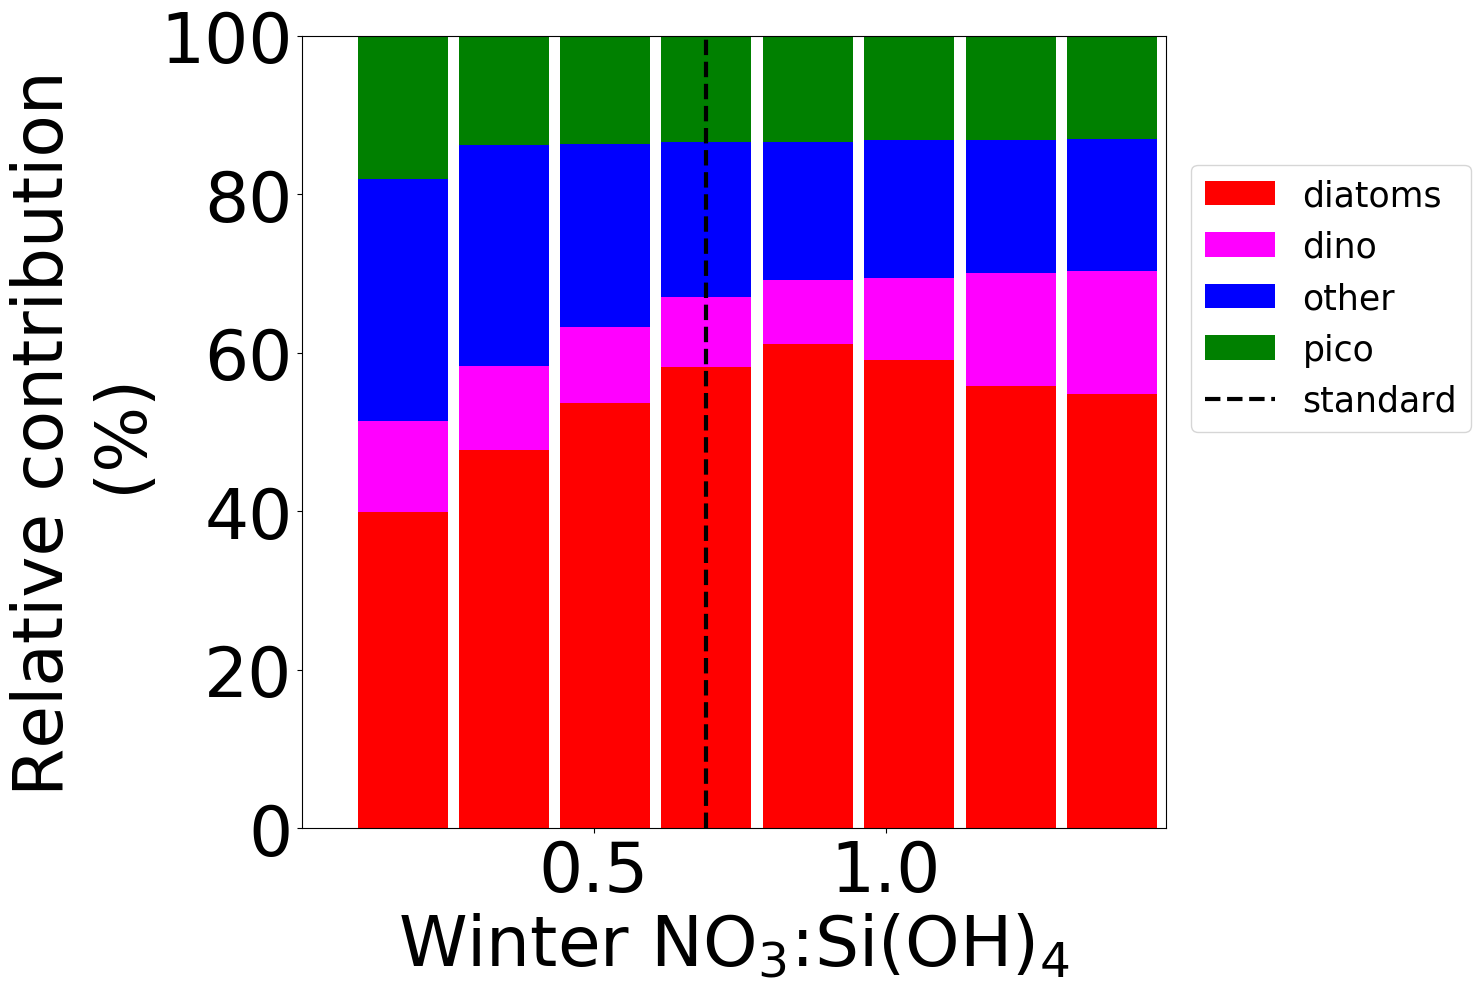

In [22]:
def make_plots(ax):
    width=1.48*125/1200
    bottom=np.zeros(len(mr))
    cc=cycler.cycler(color=['red','magenta','blue','green'])
    ax.set_prop_cycle(cc)
    for group,percentages_one_group in percentages.items():
        ax.bar(mr.values,percentages_one_group,
               width,label=group,bottom=bottom)
        bottom+=percentages_one_group.values
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$')
    ax.set_ylabel('Relative contribution\n(%)')
    ax.set_xlim(0,1.48)
    ax.set_ylim(0,100)
    ax.set_xticks(np.arange(0.5,1.48,0.5))
    ax.axvline(obsmr,
               color='k',ls='--',lw=3,label='standard')
    # 'standard' appears at the top of the legend.
    # I don't understand why.
    # the code below solves this problem and places 'legend' at the bottom
    legend_handles,legend_labels=ax.get_legend_handles_labels()
    legend_handles_new=legend_handles[1:]+[legend_handles[0]]
    legend_labels_new=legend_labels[1:]+[legend_labels[0]]
    ax.legend(legend_handles_new,legend_labels_new,loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('percentage_vs_mr.exp2.1.xlim0_1_48.png')

Figure. Relative contribution to phytoplankton biomass by
group between the bloom peak and the end of year for different values 
of "winter"
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$.
Winter
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
is the 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$
on May 15.
Note that the calculation of the molar ratio was different from Ardyna
et al. (2020) in $Elementa$.
Dotted vertical line was the observed winter 
$\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$ molar ratio at the Green Edge
sea ice camp 2016.

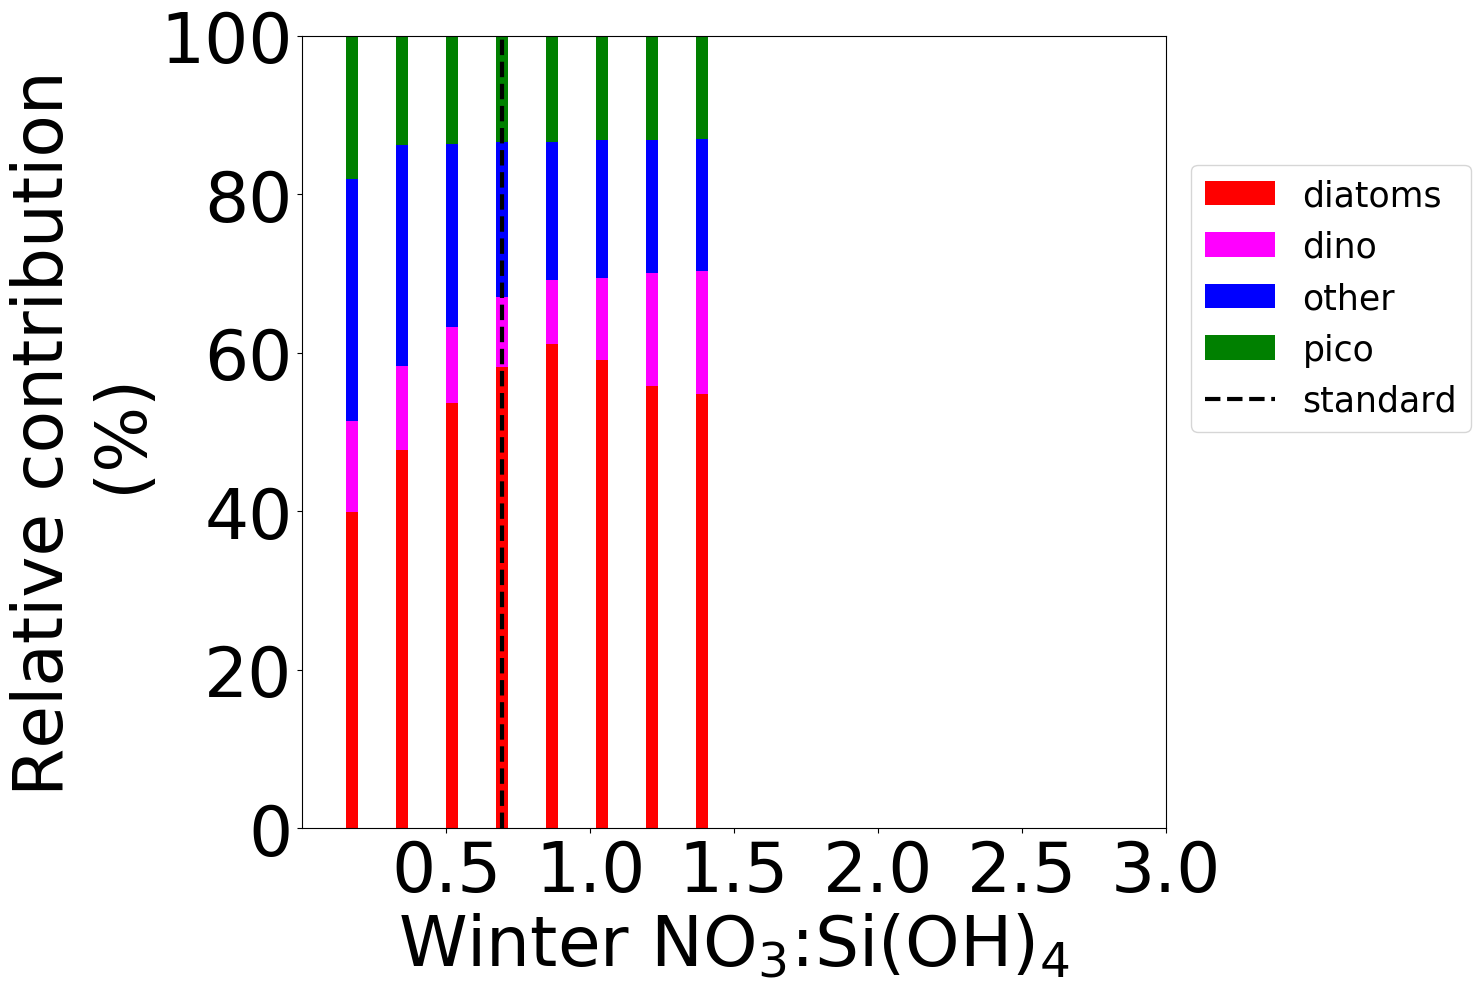

In [23]:
def make_plots(ax):
    width=0.4*125/1200
    bottom=np.zeros(len(mr))
    cc=cycler.cycler(color=['red','magenta','blue','green'])
    ax.set_prop_cycle(cc)
    for group,percentages_one_group in percentages.items():
        ax.bar(mr.values,percentages_one_group,
               width,label=group,bottom=bottom)
        bottom+=percentages_one_group.values
    ax.set_xlabel('Winter $\mathrm{ NO_3 }$:$\mathrm{ Si(OH)_4 }$')
    ax.set_ylabel('Relative contribution\n(%)')
    ax.set_xlim(0,3)
    ax.set_ylim(0,100)
    ax.set_xticks(np.arange(0.5,3.1,0.5))
    ax.axvline(obsmr,
               color='k',ls='--',lw=3,label='standard')
    # 'standard' appears at the top of the legend.
    # I don't understand why.
    # the code below solves this problem and places 'legend' at the bottom
    legend_handles,legend_labels=ax.get_legend_handles_labels()
    legend_handles_new=legend_handles[1:]+[legend_handles[0]]
    legend_labels_new=legend_labels[1:]+[legend_labels[0]]
    ax.legend(legend_handles_new,legend_labels_new,loc=(1.03,0.50))
    plt.tight_layout()

with plt.style.context('groups_after_peak.mplstyle'):
    # Plot
    fig=plt.figure(figsize=(15,10))
    ax=fig.add_subplot(111)
    make_plots(ax)
    # --- SAVE
    plt.savefig('percentage_vs_mr.exp2.1.xlim0_3.png')